# Dividir el dataset en conjunto de entrenamiento y testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../juan_gomila/datasets/ads/Advertising.csv")

In [3]:
a = np.random.randn(len(data))

(array([ 4.,  2., 10., 23., 29., 39., 51., 21., 13.,  8.]),
 array([-2.89363529, -2.38151905, -1.86940282, -1.35728659, -0.84517036,
        -0.33305413,  0.1790621 ,  0.69117834,  1.20329457,  1.7154108 ,
         2.22752703]),
 <BarContainer object of 10 artists>)

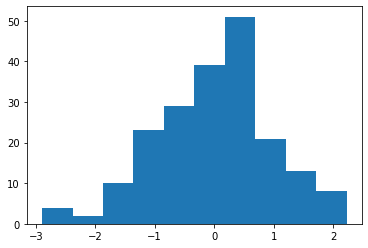

In [4]:
plt.hist(a)

In [6]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [7]:
len(training), len(testing)

(163, 37)

In [8]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     763.3
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           1.47e-82
Time:                        21:23:08   Log-Likelihood:                -313.14
No. Observations:                 163   AIC:                             632.3
Df Residuals:                     160   BIC:                             641.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0195      0.312      9.678      0.000       2.403       3.636
TV             0.0473      0.002     31.032      0.000       0.044       0.050
Radio          0.1774      0.009     19.875      0.000       0.160       0.195
==============================================================================
Omnibus:                       54.396   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.356
Skew:                          -1.395   Prob(JB):                     5.49e-31
Kurtosis:                       6.569   Cond. No.                         403.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Validación del modelo con el conjunto de testing

In [11]:
sales_pred = lm.predict(testing)
sales_pred

4      13.490469
17     23.360424
18      9.931068
19     14.229707
25     16.079879
33     19.135216
37     15.319014
42     21.826270
45     15.296691
57     12.870582
58     21.794208
64     16.816603
67     12.183343
75     11.572801
87     15.461012
95     16.352969
99     16.815426
107     7.350094
113    16.591978
115    12.782957
120    14.460356
122    14.044114
123    14.983154
124    19.609489
128    22.137252
134    11.614232
143     8.980100
144    10.197252
145     9.995050
149     9.712201
155     5.271674
162    15.145305
165    14.718361
169    18.352190
178    16.519925
181    14.316164
188    19.018144
dtype: float64

In [12]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

121.30098783436809

In [13]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.8888292968861775

In [15]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.13139064482945775